In [7]:

# graph neural network 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


import torch
from torch import tensor
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, Linear, GraphConv

import rootutils
root = rootutils.setup_root("./scripts/", dotenv=True, pythonpath=True,  indicator =  [".project-root"], cwd = True)




from scripts.nb_functions import find_filtered_voronoi_neighbor_knn_limited_mask

from scripts.models import CustomGNN
from scripts.environment import Environment
from scripts.utils import prune, get_quality, show_graph


# TODO:

Log scale!

In [8]:

positions = []

data = []

for i in range(10):
    positions.append(np.load(f"positions/random_{i}_positions.npy"))
    SMAD_ERK = np.load(f"positions/random_{i}_SMAD_and_ERK.npy")
    BMP = np.load(f"positions/random_{i}_BMP_levels.npy")
    FGF = np.load(f"positions/random_{i}_FGF_levels.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)
    BMP_FGF = np.concatenate((BMP[:,:,None], FGF[:,:,None]), axis=2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.

    d = SMAD_ERK[:201,:,:]
    # d = BMP_FGF[:201,:,:]

    # normalize the two channels independently
    d[:,:,0] = (d[:,:,0] - np.min(d[:,:,0])) / (np.max(d[:,:,0]) - np.min(d[:,:,0]))
    d[:,:,1] = (d[:,:,1] - np.min(d[:,:,1])) / (np.max(d[:,:,1]) - np.min(d[:,:,1]))
    data.append(d)
    # print(d.shape)
    

In [9]:
data[0][:,:,0].max()

1.0

(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
10
model1 | 0.25 loss: 2983.510732650757 | accuracy: 0.6925169825553894 | l1 weights: 0.0991365909576416 
20
model1 | 0.5 loss: 1159.3222618103027 | accuracy: 0.49159669876098633 | l1 weights: 0.14431115984916687 
30
model1 | 0.75 loss: 833.495020866394 | accuracy: 0.4591556191444397 | l1 weights: 0.16708403825759888 
40
model1 | 1.0 loss: 772.8317975997925 | accuracy: 0.4371744394302368 | l1 weights: 0.18481771647930145 
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
10
model2 | 0.25 loss: 2488.765001296997 | accuracy: 0.5395081639289856 | l1 weights: 0.1157660037279129 | diversity: -28.592750549316406
20
model2 | 0.5 loss: 758.8191032409

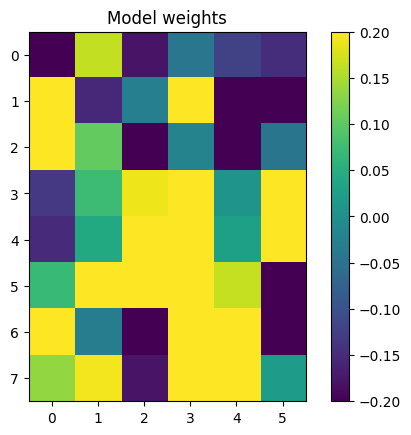

(1000, 8) (1000, 8)


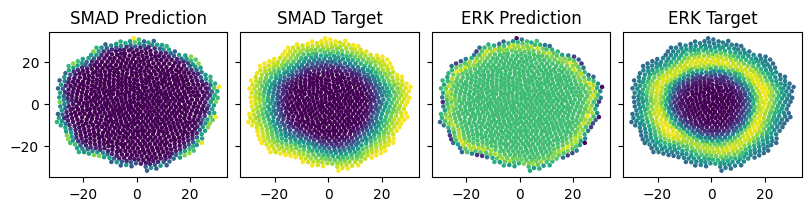

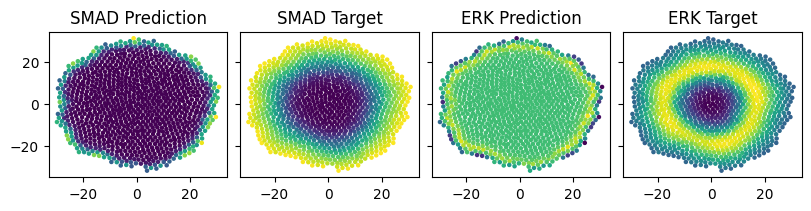

iterative0 quality: 40.04620855145047


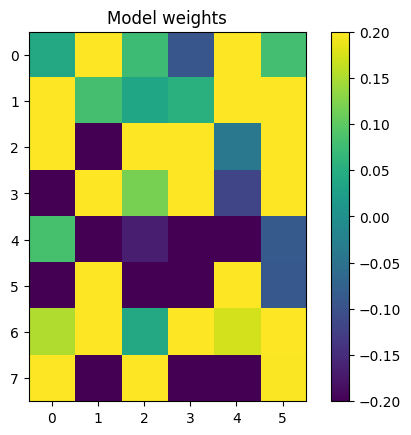

(1000, 9) (1000, 9)


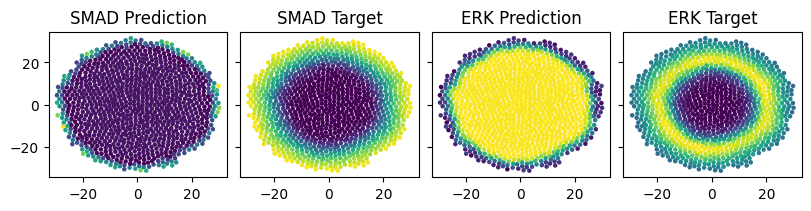

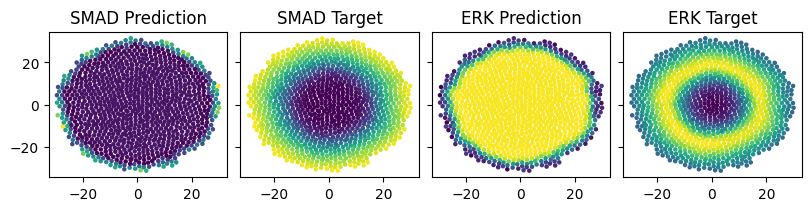

iterative1 quality: 43.630150527947244
10
10
model2 | 0.2 loss: 1017.0276165008545 | accuracy: 0.454481303691864 | l1 weights: 0.18695810437202454 | diversity: -112.71548461914062
model1 | 0.2 loss: 662.3601913452148 | accuracy: 0.39252617955207825 | l1 weights: 0.24276354908943176 | diversity: -112.71548461914062
20
model2 | 0.4 loss: 733.3706021308899 | accuracy: 0.44357192516326904 | l1 weights: 0.1899893581867218 | diversity: -123.41519165039062
20
model1 | 0.4 loss: 643.5433030128479 | accuracy: 0.37311220169067383 | l1 weights: 0.24820883572101593 | diversity: -123.45033264160156
30
model2 | 0.6 loss: 695.7465410232544 | accuracy: 0.4291902482509613 | l1 weights: 0.2023305594921112 | diversity: -136.85980224609375
30
model1 | 0.6 loss: 540.1684641838074 | accuracy: 0.34204891324043274 | l1 weights: 0.25221073627471924 | diversity: -136.5926513671875
40
model2 | 0.8 loss: 669.1718101501465 | accuracy: 0.4313991069793701 | l1 weights: 0.20692038536071777 | diversity: -132.602416992

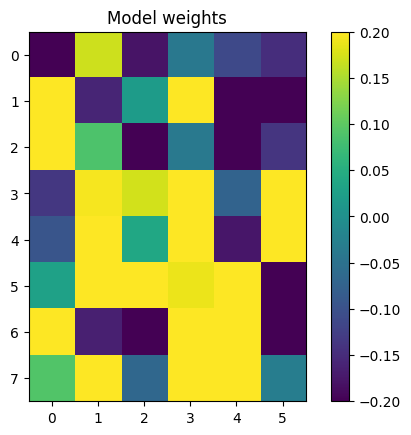

(1000, 9) (1000, 9)


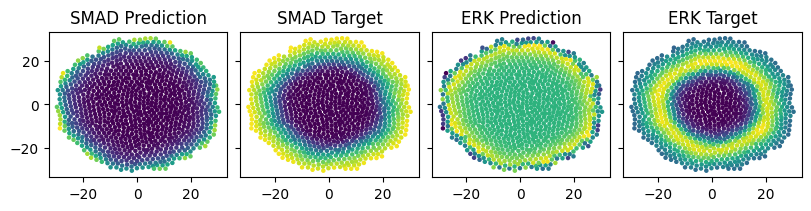

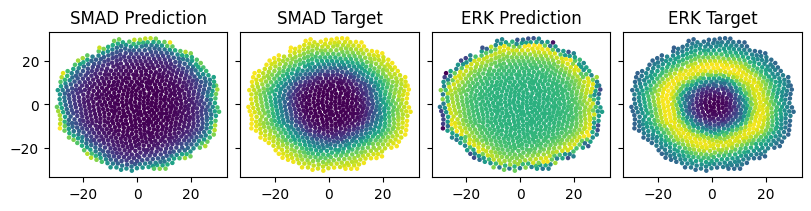

iterative0 quality: 35.11170741533675


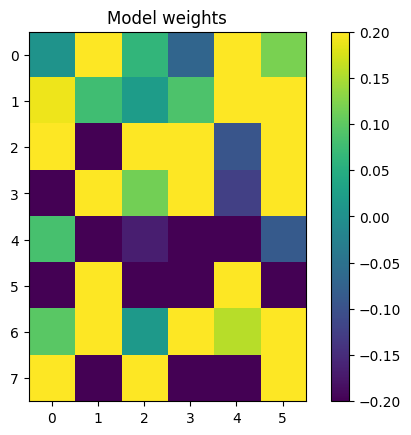

(1000, 9) (1000, 9)


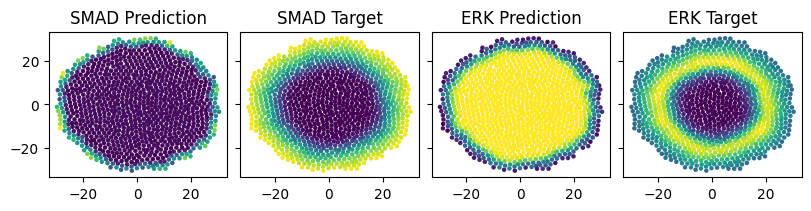

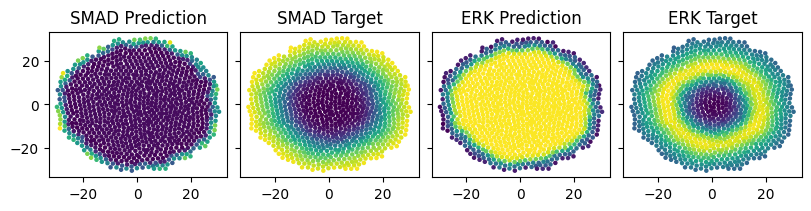

iterative1 quality: 41.304501895319156
10
10
model2 | 0.2 loss: 654.9553275108337 | accuracy: 0.4268256723880768 | l1 weights: 0.21749025583267212 | diversity: -129.92999267578125
model1 | 0.2 loss: 445.44345140457153 | accuracy: 0.33395013213157654 | l1 weights: 0.24906906485557556 | diversity: -129.92999267578125
20
20
model2 | 0.4 loss: 730.0299406051636 | accuracy: 0.42286011576652527 | l1 weights: 0.21844124794006348 | diversity: -113.17167663574219
model1 | 0.4 loss: 433.798223733902 | accuracy: 0.37805885076522827 | l1 weights: 0.24464337527751923 | diversity: -113.17167663574219
30
30
model2 | 0.6 loss: 648.2614874839783 | accuracy: 0.40353313088417053 | l1 weights: 0.22000163793563843 | diversity: -97.7477798461914
model1 | 0.6 loss: 379.06402349472046 | accuracy: 0.394790917634964 | l1 weights: 0.2383219599723816 | diversity: -97.55984497070312
40
model2 | 0.8 loss: 614.4581437110901 | accuracy: 0.38726672530174255 | l1 weights: 0.22411036491394043 | diversity: -87.4236984252

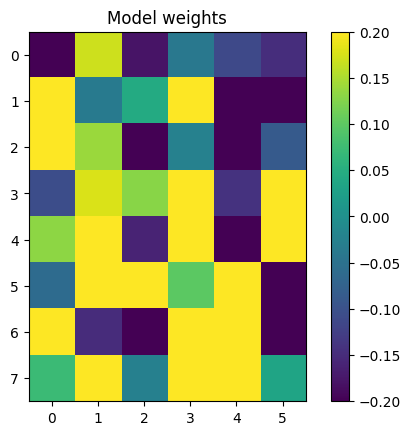

(1000, 9) (1000, 9)


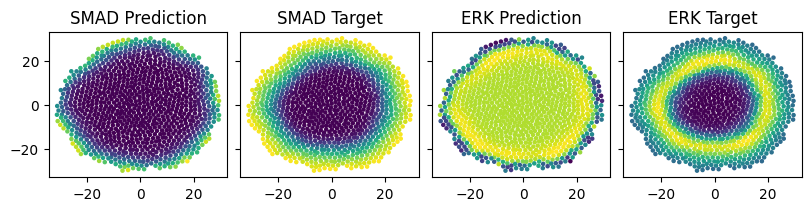

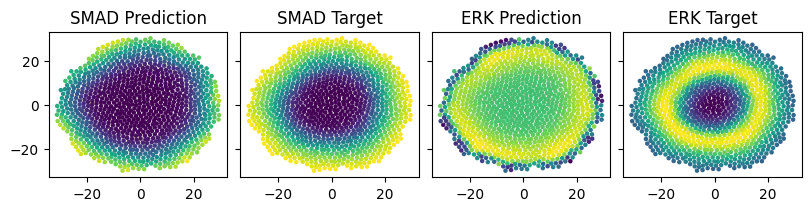

iterative0 quality: 39.139622864840604


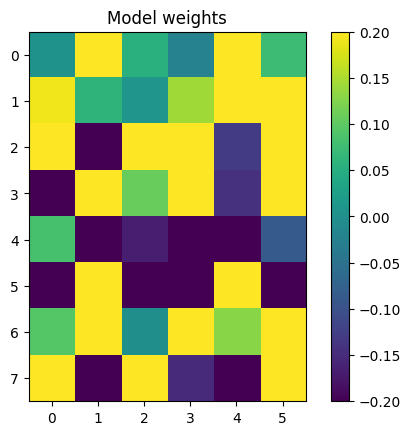

(1000, 9) (1000, 9)


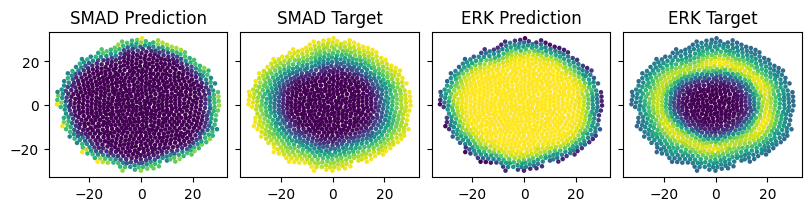

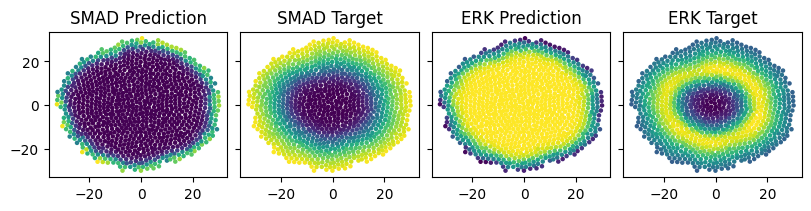

iterative1 quality: 38.36565955555158
10
10
model1 | 0.2 loss: 331.1944007873535 | accuracy: 0.4007527530193329 | l1 weights: 0.22471146285533905 | diversity: -76.79765319824219
model2 | 0.2 loss: 522.0911502838135 | accuracy: 0.36104482412338257 | l1 weights: 0.23473244905471802 | diversity: -76.79765319824219
20
20
model2 | 0.4 loss: 274.24493432044983 | accuracy: 0.2772429287433624 | l1 weights: 0.24099589884281158 | diversity: -71.65556335449219
model1 | 0.4 loss: 355.6877672672272 | accuracy: 0.3979005515575409 | l1 weights: 0.2228361964225769 | diversity: -71.65556335449219
30
30
model2 | 0.6 loss: 221.20001912117004 | accuracy: 0.2530107796192169 | l1 weights: 0.24231746792793274 | diversity: -66.83056640625
model1 | 0.6 loss: 310.9428286552429 | accuracy: 0.3705463707447052 | l1 weights: 0.22161638736724854 | diversity: -66.83056640625
40
model2 | 0.8 loss: 187.59091198444366 | accuracy: 0.23881617188453674 | l1 weights: 0.24444688856601715 | diversity: -63.068328857421875
40
m

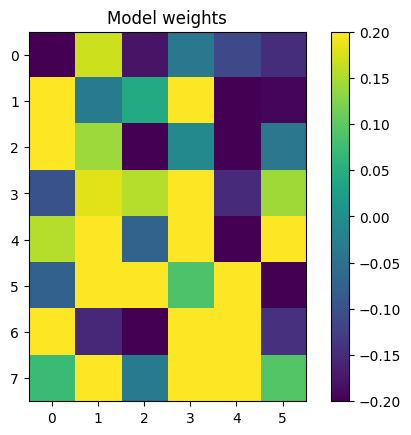

(1000, 8) (1000, 8)


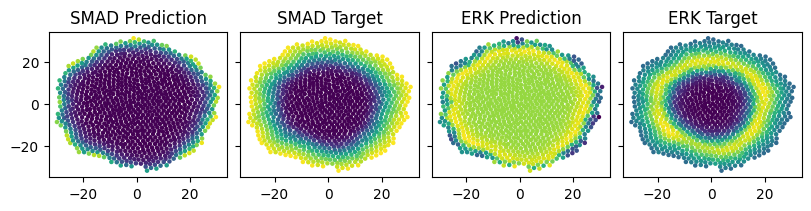

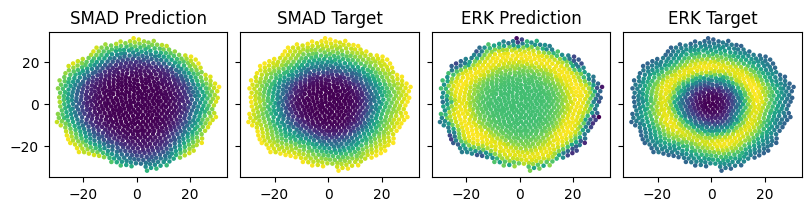

iterative0 quality: 39.673043702223225


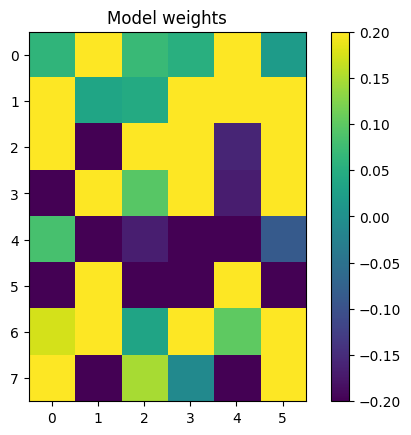

(1000, 9) (1000, 9)


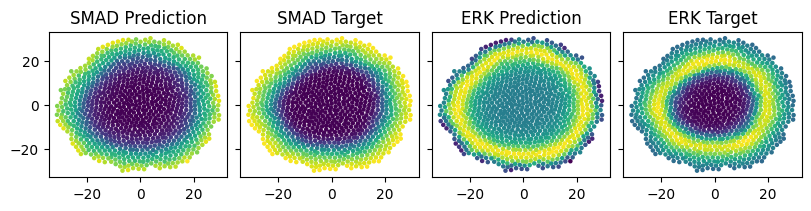

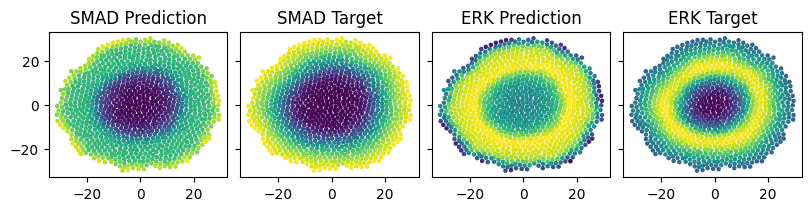

iterative1 quality: 22.6941924016189
10
10
model2 | 0.2 loss: 122.35648930072784 | accuracy: 0.21630913019180298 | l1 weights: 0.24688851833343506 | diversity: -55.48396301269531
model1 | 0.2 loss: 213.0451649427414 | accuracy: 0.38287657499313354 | l1 weights: 0.22229406237602234 | diversity: -55.43301773071289
20
model2 | 0.4 loss: 104.60780560970306 | accuracy: 0.20248055458068848 | l1 weights: 0.2456282377243042 | diversity: -51.50801467895508
20
model1 | 0.4 loss: 146.31915092468262 | accuracy: 0.3703770935535431 | l1 weights: 0.22434177994728088 | diversity: -51.39787673950195
30
model2 | 0.6 loss: 84.21187102794647 | accuracy: 0.1924784928560257 | l1 weights: 0.2441699206829071 | diversity: -48.668067932128906
30
model1 | 0.6 loss: 142.418771982193 | accuracy: 0.3118409514427185 | l1 weights: 0.22529953718185425 | diversity: -48.573509216308594
40
model2 | 0.8 loss: 63.65462392568588 | accuracy: 0.18126337230205536 | l1 weights: 0.24303941428661346 | diversity: -45.9760894775390

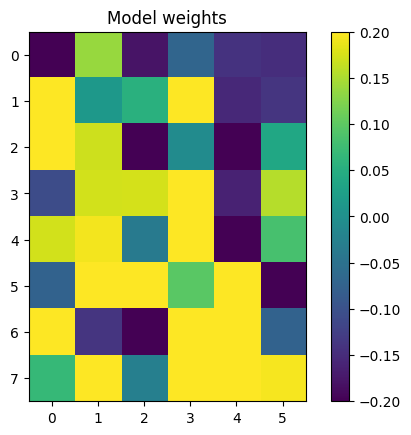

(1000, 9) (1000, 9)


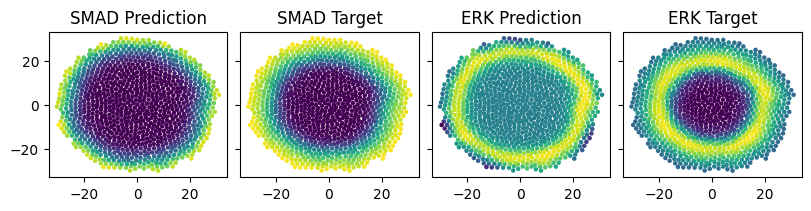

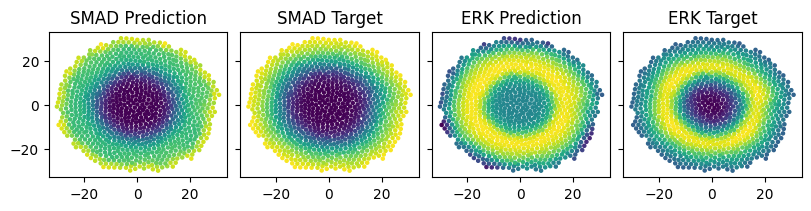

iterative0 quality: 26.058592084497576


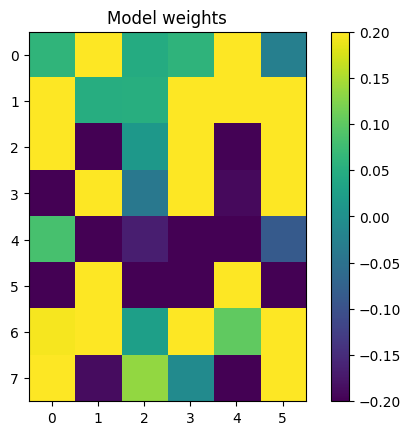

(1000, 9) (1000, 9)


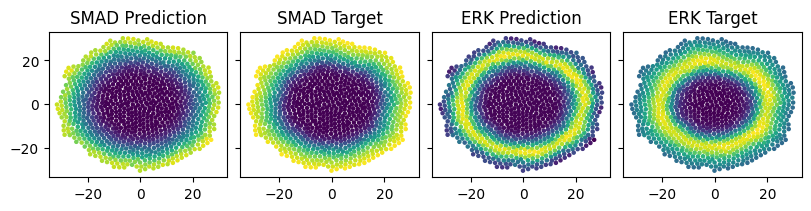

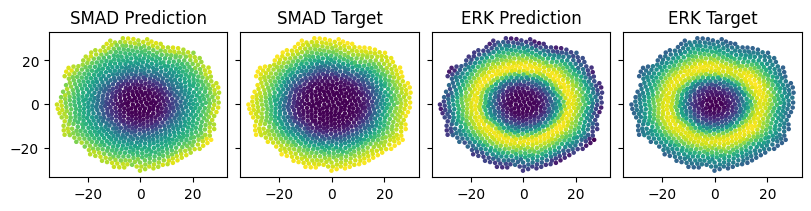

iterative1 quality: 18.11112272773824


In [12]:
stepsize = 2


for triple_i in [0]:#range(1):

    learning_rate = 1e-3
    # weight_gain = 0.7*1e-1
    # weight_gain = 1e-1
    weight_gain = 0.
    # diversity_gain = 1e-3
    # diversity_gain = 0.1*1e-4
    diversity_gain = 0.0


    model1 = CustomGNN(3, [8], 2, aggregation="mean", biases = False, name = "model1")
    env1 = Environment(data, positions, lr = learning_rate, weight_gain = weight_gain, diversity_gain = diversity_gain, stepsize = stepsize, iterative_training = True)
    env1.set_model(model1)
    env1.train(40)

    model2 = CustomGNN(3, [8], 2, aggregation="mean", biases = False, name = "model2")
    env2 = Environment(data, positions, lr = learning_rate, weight_gain = weight_gain, diversity_gain = diversity_gain, stepsize = stepsize, iterative_training = True)
    env2.set_model(model2)
    env2.set_previous_model(model1)
    env2.train(40)

    from threading import Thread
    # for i in range(5):
    for i in range(5):
        threads = []

        env1.set_previous_model(model2)
        env2.set_previous_model(model1)

        t1 = Thread(target= lambda: env1.train(int(50)))
        threads.append(t1)
        t2 = Thread(target= lambda: env2.train(int(50)))
        threads.append(t2)
        t1.start()
        t2.start()
        for t in threads:
            t.join()
        print(f"Finished training {i}th iteration")

        # get quality(model1, data, positions, stepsize, show = 2, guess_change = False)

        hq = 0.
        for ii, model in enumerate([model1, model2]):
            name = f"iterative{ii + 2*triple_i}"
            torch.save(model.state_dict(), "models/" + name + ".pth")
            plt.imshow(model.get_weights()[0].detach().numpy(), cmap="viridis", vmin=-0.2, vmax=0.2)
            plt.colorbar()
            plt.title("Model weights")
            plt.show()
            qual = get_quality(model, data, positions, stepsize, show = 2, guess_change = False)
            print(name + f" quality: {qual}")
            if qual > hq:
                hq = qual

        # if hq > 40:
        #     diversity_gain *= 0.7
        #     weight_gain *= 0.7
        #     print("Decreasing diversity and weight gain")
        #     print(f"they are now at {diversity_gain:.2f} {weight_gain:.2f}")
        # elif hq < 10:
        #     diversity_gain *= 1.7
        #     weight_gain *= 1.7
        #     print("Increasing diversity and weight gain")
        #     print(f"they are now at {diversity_gain:.2f} {weight_gain:.2f}")


        # env1.set_diversity_gain(diversity_gain)
        # env2.set_diversity_gain(diversity_gain)
        # env1.set_weight_gain(weight_gain)
        # env2.set_weight_gain(weight_gain)







In [4]:
# load the models

stepsize = 2
models = []

names = []
# for i in range(6):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"concurrent_model_unaffected{i}.pth"))
#     models.append(model)
#     names.append(f"null {i}")

# for i in range(6):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"concurrent_model{i}.pth"))
#     models.append(model)
#     names.append(f"model {i}")


# for i in range(6):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"concurrent_model_symmetric{i}.pth"))
#     models.append(model)
#     names.append(f"symmetric {i}")


# for i in range(6):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"concurrent_model_long{i}.pth"))
#     models.append(model)
#     names.append(f"long {i}")

   
for i in range(20):
    model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(f"models/new_null{i}.pth"))
    models.append(model)
    names.append(f"null {i}")

    
for i in range(10):
    model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(f"models/new_runs{i}.pth"))
    models.append(model)
    names.append(f"model {i}")

for i in range(12):
    model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(f"models/new_runs_more{i}.pth"))
    models.append(model)
    names.append(f"more model {i}")
# for i in range(22):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"models/overnight{i}.pth"))
#     models.append(model)
#     names.append(f"overnight {i}")

# for i in range(4):
#     model = CustomGNN(3, [8], 2, aggregation="mean", biases = False)
#     model.load_state_dict(torch.load(f"models/overnight_more{i}.pth"))
#     models.append(model)
#     names.append(f"more {i}")

    
    

In [5]:
qualities = np.zeros(len(models)) 
for i, model in enumerate(models):
    qualities[i] = get_quality(model, data, positions, stepsize, show = 0, guess_change = False)
    print(f"Model {i} ({names[i]}) quality: {qualities[i]}")

(1000, 9) (1000, 9)
Model 0 (null 0) quality: 17.725494820175697
(1000, 9) (1000, 9)
Model 1 (null 1) quality: 25.118377325757304
(1000, 9) (1000, 9)
Model 2 (null 2) quality: 22.827008840430423
(1000, 9) (1000, 9)
Model 3 (null 3) quality: 20.494627140047726
(1000, 9) (1000, 9)
Model 4 (null 4) quality: 20.978393696043053
(1000, 9) (1000, 9)
Model 5 (null 5) quality: 20.635174409560925
(1000, 8) (1000, 8)
Model 6 (null 6) quality: 34.78973415090295
(1000, 9) (1000, 9)
Model 7 (null 7) quality: 18.452747194436768
(1000, 9) (1000, 9)
Model 8 (null 8) quality: 23.31492724819365
(1000, 9) (1000, 9)
Model 9 (null 9) quality: 22.126068074315196
(1000, 9) (1000, 9)
Model 10 (null 10) quality: 21.366378032515122
(1000, 9) (1000, 9)
Model 11 (null 11) quality: 25.162528571621266
(1000, 9) (1000, 9)
Model 12 (null 12) quality: 22.089502626343222
(1000, 9) (1000, 9)
Model 13 (null 13) quality: 19.652752720985045
(1000, 9) (1000, 9)
Model 14 (null 14) quality: 21.104370712813513
(1000, 9) (1000, 

In [18]:
from scripts.utils import find_most_optimal_permutations, implement_permutations
def get_detached_weights(model):
    return [weight.detach().numpy() for weight in model.get_weights()]


# dist_fn = lambda x, y: ((x - y) ** 2).mean() ** 0.5
# dist_fn = lambda x, y: np.linalg.norm(x - y)

# manhattan distance
dist_fn = lambda x, y: np.abs(x - y).sum()
def get_euclidian_diversity(model1, model2):
    weights1 = get_detached_weights(model1)
    weights2 = get_detached_weights(model2)
    

    all_permutations = find_most_optimal_permutations([weights1, weights2], signed = False)

    weights1_perm = implement_permutations(weights1, all_permutations[0])
    weights2_perm = implement_permutations(weights2, all_permutations[1])

    distances = []
    for i in range(len(weights1)):
        distance = dist_fn(weights1_perm[i], weights2_perm[i])
        distances.append(distance)
        break
    
    distances = np.array(distances)

    d0 = dist_fn(weights1[0], weights2[0])
    
    assert distances[0] < d0, f"Permuted distance is ({distances[0]}) is not smaller than naive ({d0})!!!"

    return distances.mean()


def get_euclidian_diversities(models):
    weights = [get_detached_weights(model) for model in models]
    

    all_permutations = find_most_optimal_permutations(weights, signed = False)

    weights_perm = [implement_permutations(weights[i], all_permutations[i]) for i in range(len(weights))]

    distances = np.zeros((len(models), len(models)))
    d0s = np.zeros((len(models), len(models)))
    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            distance = dist_fn(weights_perm[i][0], weights_perm[j][0])
            distances[i, j] = distance

            d0s[i, j] = dist_fn(weights[i][0], weights[j][0])


    # assert np.all(distances <= d0s), f"Permuted distance is not smaller than naive!!!" + str(distances <= d0s)

    return distances



get_euclidian_diversity(models[0], models[1])

get_euclidian_diversities([models[0], models[1]])

array([[0.        , 3.15778613],
       [0.        , 0.        ]])

In [19]:
diversities = np.zeros((len(models), len(models)))

euclidian_diversities = get_euclidian_diversities(models)


twod_qualities = np.zeros((len(models), len(models)))   

for i, model1 in enumerate(models):
    for j, model2 in enumerate(models):
        if i < j:
            d = Environment.get_diversity_symmetric(model1.get_weights(), model2.get_weights())
            diversities[i, j] = d 

            twod_qualities[i, j] = qualities[i] + qualities[j]



# sums = np.sum(diversities, axis = 1) + np.sum(diversities, axis = 0)

# diversities[:,0] = sums/15

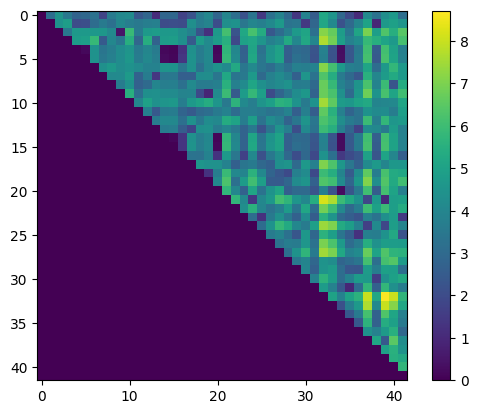

In [20]:
plt.imshow(euclidian_diversities)
plt.colorbar()

In [21]:
diversities /= np.max(np.abs(diversities.copy()))
euclidian_diversities /= np.max(np.abs(euclidian_diversities.copy()))

In [22]:
l1_sum_of_weights = np.zeros(len(models))
percentage_zero_weights = np.zeros(len(models))
for i, model in enumerate(models):
    weights = model.get_weights()[0].detach().numpy()
    l1_sum_of_weights[i] = np.sum(np.abs(weights))
    percentage_zero_weights[i] = np.mean(np.abs(weights) < 1e-4)



In [23]:
l1_sum_of_weights

array([4.90319157, 4.89242411, 4.96793842, 5.17192364, 4.27108812,
       4.32669353, 3.93173885, 5.18361282, 5.3040266 , 4.93385363,
       4.96721077, 4.77815771, 5.27367973, 5.25368595, 4.24816227,
       4.29323006, 4.6719265 , 4.92708778, 4.87244511, 4.91200733,
       4.28724432, 4.43714333, 4.97910023, 4.85653353, 5.04239178,
       4.9536128 , 4.99176359, 4.94782019, 4.30759907, 5.18728161,
       5.27877426, 5.10535908, 7.35997963, 6.41587305, 4.46665287,
       5.177001  , 5.4601841 , 5.36174631, 5.44416475, 4.93648243,
       5.67489147, 5.82741499])

In [24]:
percentage_zero_weights

array([0.54166667, 0.52083333, 0.52083333, 0.4375    , 0.6875    ,
       0.6875    , 0.64583333, 0.4375    , 0.375     , 0.58333333,
       0.52083333, 0.54166667, 0.45833333, 0.45833333, 0.6875    ,
       0.6875    , 0.54166667, 0.52083333, 0.52083333, 0.5       ,
       0.625     , 0.625     , 0.54166667, 0.54166667, 0.52083333,
       0.47916667, 0.47916667, 0.54166667, 0.64583333, 0.39583333,
       0.52083333, 0.54166667, 0.4375    , 0.39583333, 0.6875    ,
       0.4375    , 0.5       , 0.5625    , 0.52083333, 0.5625    ,
       0.375     , 0.47916667])

(42,) (42, 42)
(43,) (42, 43)


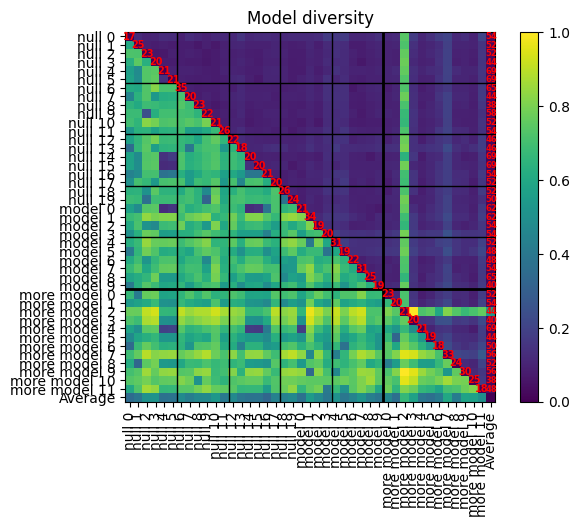

: 

In [ ]:
# plot_diversities = np.log(np.abs(diversities.copy())+1)
plot_diversities = np.sqrt(np.abs(diversities.copy()))

plot_diversities += np.sqrt(euclidian_diversities.copy().T)



diversity_means = np.mean(np.abs(diversities.copy() + diversities.copy().T), axis = 1)

euclidian_means = np.mean(np.abs(euclidian_diversities.copy() + euclidian_diversities.copy().T), axis = 1)


def add_row(arr, row):
    arr_len = arr.shape[1]
    row_len = row.shape[0]
    len = arr_len - row_len
    assert len >= 0, f"Row is longer than array ({len})"


    row = np.concatenate([row, [0]*len])
    print(row.shape, arr.shape)
    arr = np.concatenate([arr, row.reshape(1, -1)], axis = 0)

    return arr

def add_column(arr, column):
    return add_row(arr.T, column).T



# add column of means to the plot_diversities
# plot_diversities = np.concatenate([plot_diversities, diversity_means.reshape(-1, 1)], axis = 1)
# plot_diversities = add_column(plot_diversities, diversity_means)
plot_diversities = add_column(plot_diversities, diversity_means)


# add row of means to the plot_diversities
# plot_diversities = np.concatenate([plot_diversities, euclidian_means.reshape(1, -1)], axis = 0)
plot_diversities = add_row(plot_diversities, euclidian_means)

plt.imshow(plot_diversities, cmap="viridis")
plt.colorbar()
plt.title("Model diversity")




# for each y-tick, add the quality of the model
for i in range(len(models)):
    plt.text(i, i, f"{qualities[i]:.0f}", ha='center', va='center', color='red', fontsize=7, fontdict={"weight": "bold"})

# for each y-tick, add the percentage zero-weights
for i in range(len(models)):
    plt.text(len(models)+0.1, i, f"{percentage_zero_weights[i]*100:.0f}", ha='center', va='center', color='red', fontsize=6, fontdict={"weight": "bold"})



# draw in lines separating the models
for i in range(5):
    plt.axhline(i*6+5.4, color='black', lw=1)
    plt.axvline(i*6+5.5, color='black', lw=1)
plt.axhline(i*6+5.4, color='black', lw=2)
plt.axvline(i*6+5.5, color='black', lw=2)

plt.xticks(range(len(models)+1), names + ["Average"], rotation=90)
plt.yticks(range(len(models)+1), names + ["Average"])
plt.show()

In [9]:

weights = [get_detached_weights(model) for model in models]


all_permutations = find_most_optimal_permutations(weights, signed = False)

weights_perm = [implement_permutations(weights[i], all_permutations[i]) for i in range(len(weights))]



In [10]:
unraveled = np.array([np.ravel(weight[0]) for weight in weights_perm])

print(unraveled.shape)

(30, 48)


In [18]:
from umap import UMAP

umap = UMAP(metric='euclidean', random_state=42)

embedding = umap.fit_transform(unraveled)


c:\Users\jakob\.conda\envs\NCA\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jakob\.conda\envs\NCA\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [19]:
print(embedding.shape)

(30, 2)


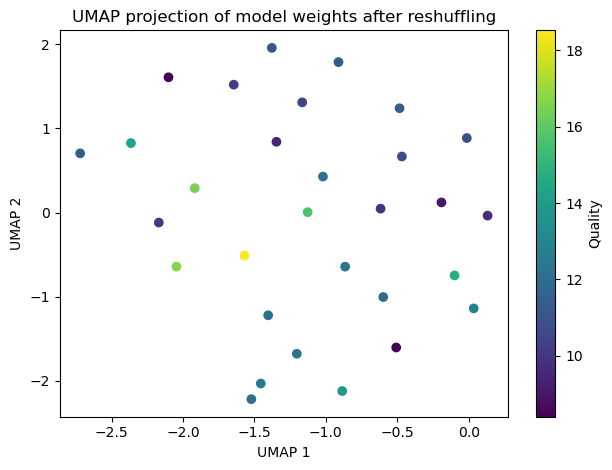

In [28]:
plt.scatter(embedding[:, 0], embedding[:, 1], c = qualities, cmap="viridis")

plt.title("UMAP projection of model weights after reshuffling")
plt.colorbar(label = "Quality")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()

# get distances between each pair of points
UMAP_distances = np.zeros((len(models), len(models)))

for i in range(len(models)):
    for j in range(i + 1, len(models)):
        distance = np.linalg.norm(embedding[i] - embedding[j])
        UMAP_distances[i, j] = distance





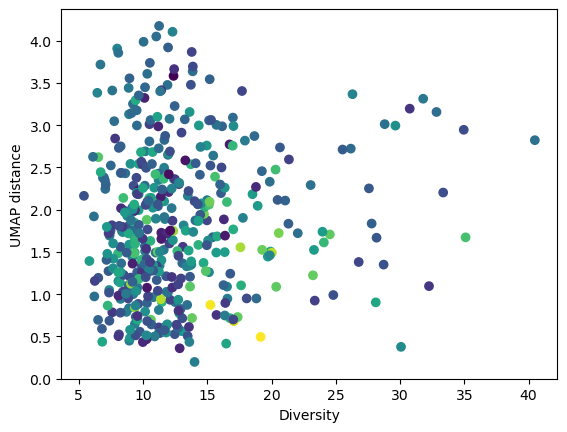

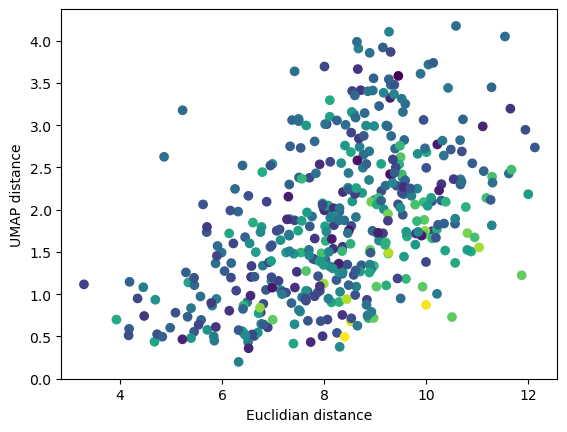

In [25]:
# UMAP_distances
# diversities
# euclidian_diversities

plt.scatter(np.abs(diversities[twod_qualities> 2]), UMAP_distances[twod_qualities> 2], c = twod_qualities[twod_qualities> 2])
plt.xlabel("Diversity")
plt.ylabel("UMAP distance")
plt.show()

plt.scatter(euclidian_diversities[twod_qualities> 2], UMAP_distances[twod_qualities> 2], c = twod_qualities[twod_qualities> 2])
plt.xlabel("Euclidian distance")
plt.ylabel("UMAP distance")
plt.show()


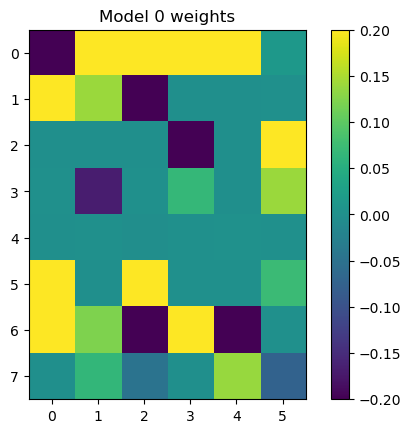

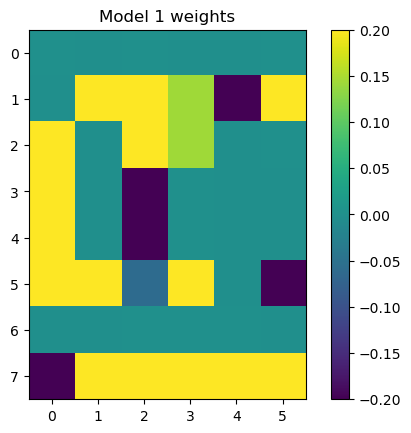

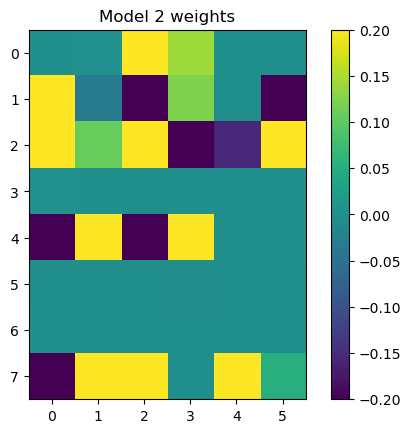

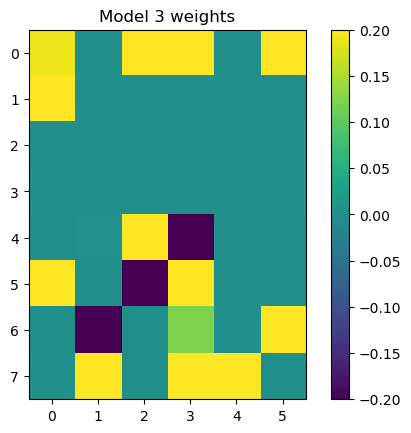

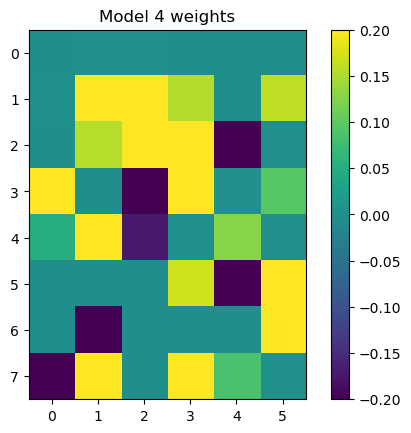

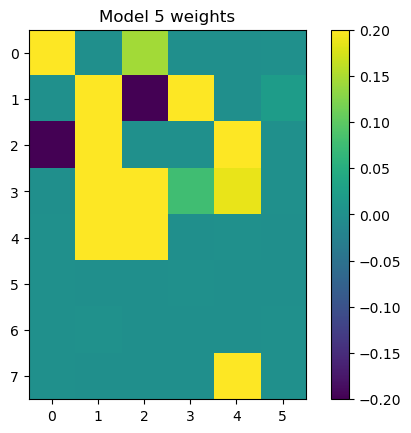

In [51]:
# plot the weights
for i, model in enumerate(models):
    plt.imshow(model.get_weights()[0].detach().numpy(), cmap="viridis", vmin=-0.2, vmax=0.2)
    plt.colorbar()
    plt.title(f"Model {i} weights")
    plt.show()

In [99]:
weights1["input_layer.lin_rel.weight"]

tensor([[-5.0799e-01,  7.6117e-01,  3.3223e-01,  3.7335e-01,  2.4387e-01,
          1.3659e-02],
        [ 4.5320e-01,  1.3945e-01, -3.9715e-01, -4.6972e-05, -3.2257e-05,
          6.4465e-05],
        [-2.0090e-04, -2.2852e-04, -5.8917e-05, -3.4875e-01, -3.2308e-05,
          4.5766e-01],
        [ 2.0733e-05, -1.6769e-01,  6.1321e-05,  6.6190e-02, -7.7179e-05,
          1.3991e-01],
        [-7.6989e-05,  1.0568e-04, -1.7273e-03,  2.1310e-04,  1.8432e-03,
          9.8522e-06],
        [ 3.9691e-01, -3.1490e-05,  6.9989e-01,  3.1049e-05,  6.5066e-05,
          7.2539e-02],
        [ 5.0912e-01,  1.2342e-01, -6.6224e-01,  4.4218e-01, -2.1651e-01,
          1.4027e-04],
        [-1.8345e-05,  6.4331e-02, -4.7038e-02, -2.4598e-04,  1.3758e-01,
         -7.3933e-02]])

In [101]:
weights2[0]

Parameter containing:
tensor([[ 7.6727e-06, -6.5544e-06,  2.4995e-05, -7.2251e-06, -8.1232e-05,
          6.7028e-05],
        [-2.4527e-04,  2.8159e-01,  6.2504e-01,  1.4319e-01, -3.2680e-01,
          4.2304e-01],
        [ 5.7162e-01, -1.4926e-03,  7.6953e-01,  1.4335e-01, -8.1316e-05,
          4.2123e-04],
        [ 6.0970e-01, -8.8816e-06, -4.9931e-01,  1.3342e-04, -1.7347e-04,
         -5.0592e-06],
        [ 7.1046e-01, -1.0340e-04, -5.8124e-01,  5.5141e-05, -7.3411e-05,
         -2.8614e-05],
        [ 2.5231e-01,  7.6270e-01, -5.9958e-02,  2.0718e-01, -5.6159e-04,
         -6.9939e-01],
        [-5.1243e-04, -5.6087e-06,  6.5887e-05,  1.2631e-05,  7.3382e-05,
         -1.0223e-03],
        [-5.4070e-01,  4.8591e-01,  2.1757e-01,  2.4311e-01,  3.4403e-01,
          3.1025e-01]], requires_grad=True)

In [104]:
# make toy example

# w1_np = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], ]).T
# w2_np = np.array([[0.1, 0.2, 0.3], [0.4, 0.7, 0.6], ]).T

w1 = weights1["input_layer.lin_rel.weight"].T
w2 = weights2[0].T

print(w1.shape)



rows = w1[None, :, :] - w2[:, None, :]

print(rows.shape)

a_b_diffs = torch.linalg.norm(rows, dim=2)

a_norms = torch.linalg.norm(w1, dim=0)
b_norms = torch.linalg.norm(w2, dim=0)
layers = torch.prod(a_b_diffs , dim=1) #/ (a_norms[:, None] + b_norms[None, :])



sums = torch.sum(layers)

print(sums.item())

torch.Size([6, 8])
torch.Size([6, 6, 8])
21.20732307434082


In [62]:
print(w1_np.shape)

(2, 3)


In [60]:
(w1[:, :, None] - w2[:, None, :]).shape

torch.Size([2, 3, 3])

In [53]:
w1_np 

array([[0.1, 0.2, 0.3],
       [0.4, 0.7, 0.6],
       [0.7, 0.8, 0.9]])

TODO:

Get data from the actual system of interest

PINN!

Encoding?


IDEA:

Get latent space representation. Learn taylor paramaters.


Physics Informed Symbolic(?) Embedding/Latent(-something) Internally-recurrent Parsimonious Graph Neural Cellular Automata

In [ ]:
stepsize = 2
def train_i(i):
    model = None
    env = None

    model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
    env = Environment(data, positions, lr = 0.001, weight_gain = 1e-5, stepsize = stepsize, iterative_training = False)
    env.set_model(model)
    env.train(70)
    env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-4, stepsize = stepsize, iterative_training = False)
    env.set_model(model)
    env.train(70)


    torch.save(model.state_dict(), f"model{700+i}.pth")

from threading import Thread

# def train_i_iterative(i):
#     model = None
#     env = None

#     model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
#     env = Environment(data, positions, lr = 0.001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = False)
#     env.set_model(model)
#     env.train(100)
#     env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = True)
#     env.set_model(model)
#     env.train(50)

#     torch.save(model.state_dict(), f"model{500+i}.pth")

for i in range(10):
    # reset
    model = None
    env = None

    t = Thread(target=train_i, args=(i,))
    t.start()

# for i in range(10):
#     # reset
#     model = None
#     env = None

#     model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
#     env = Environment(data, positions, lr = 0.001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = False)
#     env.set_model(model)
#     env.train(500)
#     env = Environment(data, positions, lr = 0.0001, weight_gain = 1e-6, stepsize = stepsize, iterative_training = True)
#     env.set_model(model)
#     env.train(200)


#     torch.save(model.state_dict(), f"model{500+i}.pth")


(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 8) (1000, 8)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)
(1000, 9) (1000, 9)


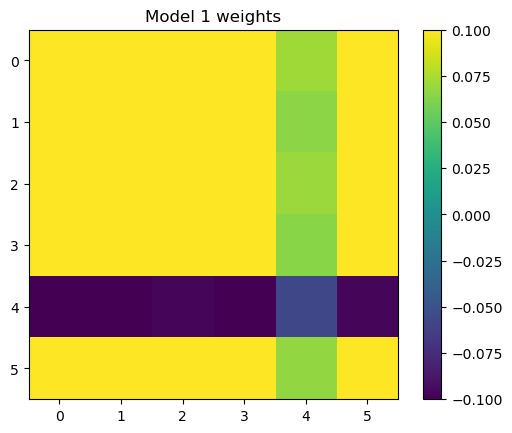

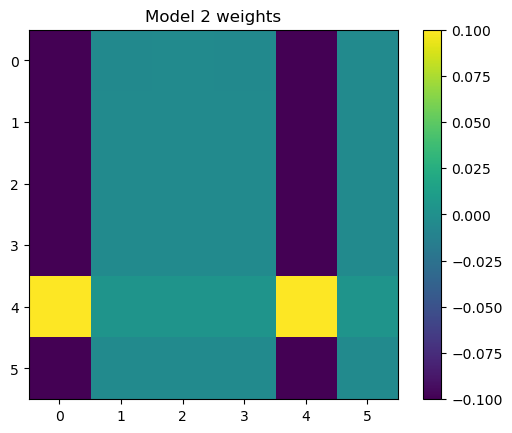

(1000, 9) (1000, 9)


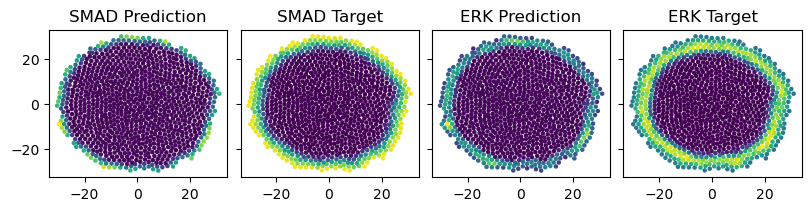

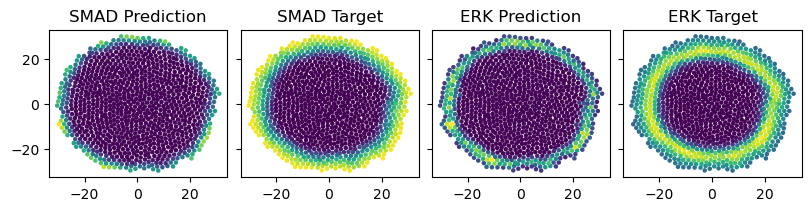

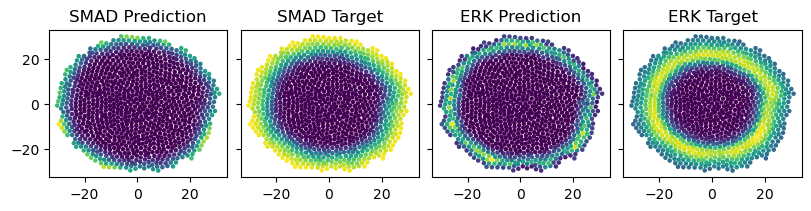

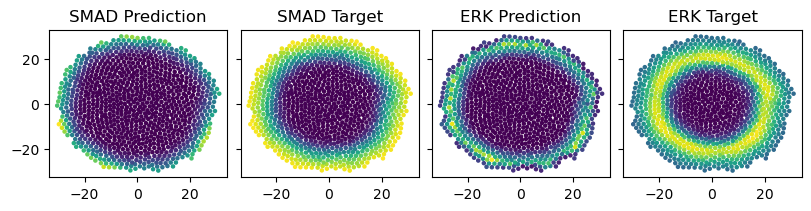

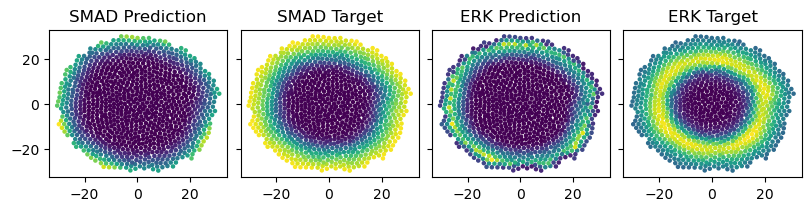

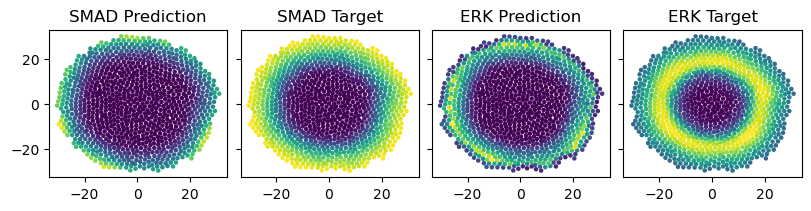

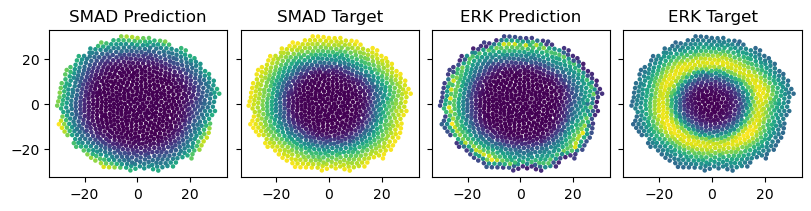

np.float64(20.647461668236616)

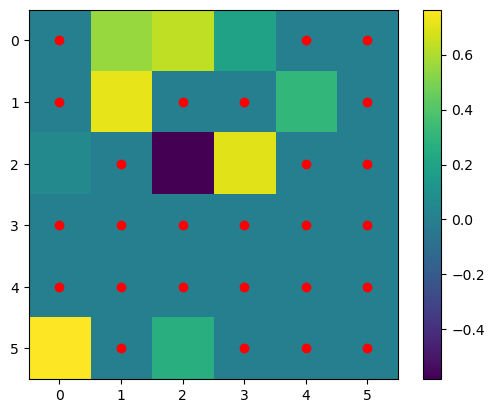

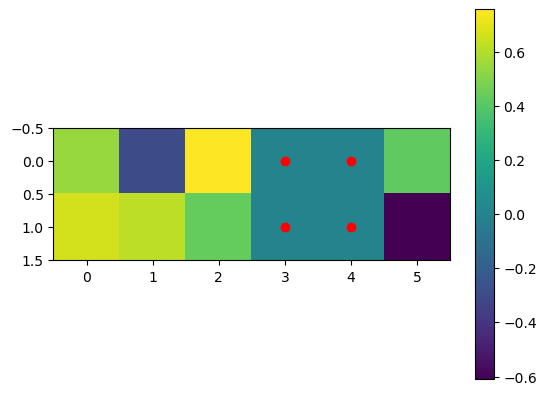

[array([[ True, False, False, False,  True,  True],
        [ True, False,  True,  True, False,  True],
        [False,  True, False, False,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True],
        [False,  True, False,  True,  True,  True]]),
 array([[False, False, False,  True,  True, False],
        [False, False, False,  True,  True, False]])]

In [18]:
prune(model, 0.01)

In [21]:
import sympy as sp

# set up the variables
S = sp.symbols('S', positive=True, real=True)
E = sp.symbols('E', positive=True, real=True)
B = sp.symbols('B', positive=True, real=True)
nb_S = sp.symbols('S_nb', positive=True, real=True)
nb_E = sp.symbols('E_nb', positive=True, real=True)
nb_B = sp.symbols('B_nb', positive=True, real=True)

inp_vec = sp.Matrix([ S, E, B, nb_S, nb_E, nb_B,])
# inp_vec = sp.Matrix([ S,B, nb_S,nb_B,])
inp_vec = sp.Matrix([S, B, nb_S, nb_B,])

# calculate the first layer
W0 = sp.Matrix(weights[0] * ~prune_masks[0])

X = W0*inp_vec
activation = sp.Function('sigma')

# activation = lambda x: x if x > 0 else 0
# activation = lambda x: x


XXX = []
for x in X:
    terms = sp.Add.make_args(x)
    if terms is None:
        XXX.append(x)
        continue

    if all(np.array(terms)>0):
        XXX.append(x)
        continue
    
    if all(np.array(terms)<0):
        XXX.append(0)
        continue

    XXX.append(activation(x))

# X = sp.Matrix([activation(x) for x in X])
X = sp.Matrix(XXX)

# squared

# sigmoid
# activation = lambda x: 1/(1 + sp.exp(-x))

# softplus
# activation = lambda x: sp.log(1 + sp.exp(x))


for i in range(1, len(weights)):
    W = sp.Matrix(weights[i] * ~prune_masks[i])
    X = W*X

    if i != len(weights)-1:
        X = sp.Matrix([activation(x) for x in X])

# define the activation function



# calculate the second layer

# simplify the expression


X

Matrix([[0.0349407*B + 0.63202*S + 0.357722*S_nb]])

In [191]:
# define differences 
S_diff = sp.symbols('S_diff', positive=True, real=True)
E_diff = sp.symbols('E_diff', positive=True, real=True)
B_diff = sp.symbols('B_diff', positive=True, real=True)

X_subbed = X.subs({S: nb_S + S_diff, E: nb_E + E_diff, B: nb_B + B_diff})

simp = sp.simplify(X,)
simp[0]


0.2185*E_nb - 0.011138*S + 0.262114*S_nb + 0.064207*sigma(-1.46919*B_nb - 0.338297*E + 1.8317*E_nb) + 0.113426*sigma(2.32898*B_nb - 1.49906*E_nb - 1.26453*S_nb) + 0.0281599*sigma(-0.439438*B - 0.642633*B_nb + 1.5287*E_nb + 1.13931*S_nb)